### Create a Histogram with Matplotlib and Seaborn

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# sample data
sample_data = pd.read_csv('sample-data/stroopdata.csv')
sample_data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


About fix, ax = plt.subplots() from [Stack Overflow](http://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python):

---
plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png'). You certainly don't have to use the returned figure object but many people do use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway, thus:

fig, ax = plt.subplots()
is more concise than this:

fig = plt.figure()
ax = fig.add_subplot(111)

---

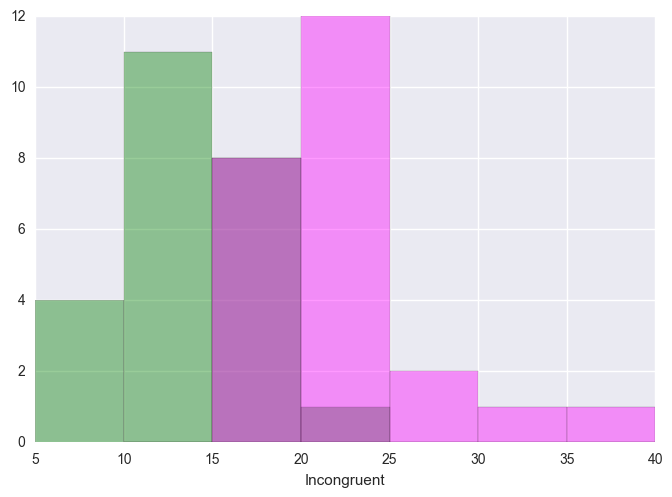

In [48]:
# the Congruent column (a Pandas Series)
cong = sample_data['Congruent']
# the Incongruent column (also a Pandas Series)
incong = sample_data['Incongruent']

# matplotlib creating the figure for plotting
fig, ax = plt.subplots()

# two plots, one figure
sns.distplot(cong, bins=range(5,45,5), color='green', ax=ax, kde=False)
sns.distplot(incong, bins=range(5,45,5), color='magenta', ax=ax, kde=False)

plt.show()

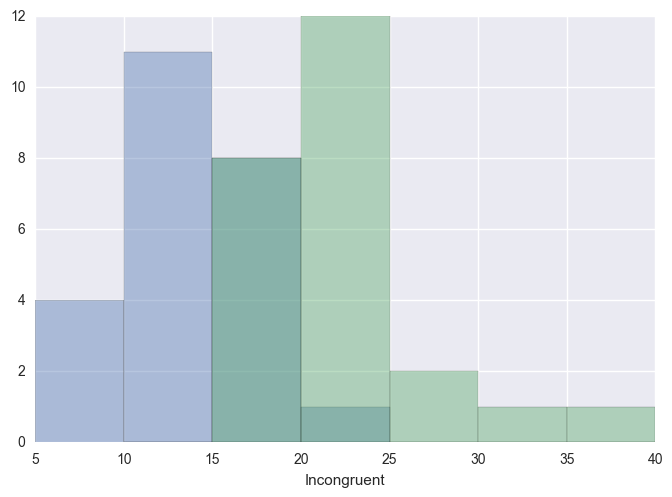

In [49]:
# use a for loop to create multiple plots on one figure
# colors chosen automatically

fig, ax = plt.subplots()

for a in [cong,incong]:
    sns.distplot(a, bins=range(5,45,5), ax=ax, kde=False)
    
plt.show()

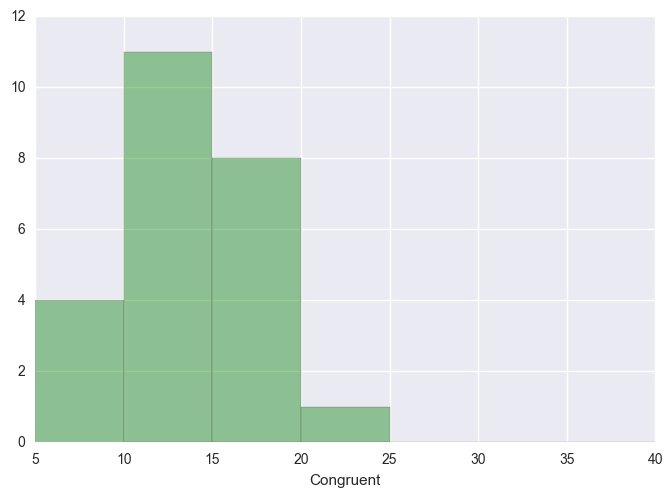

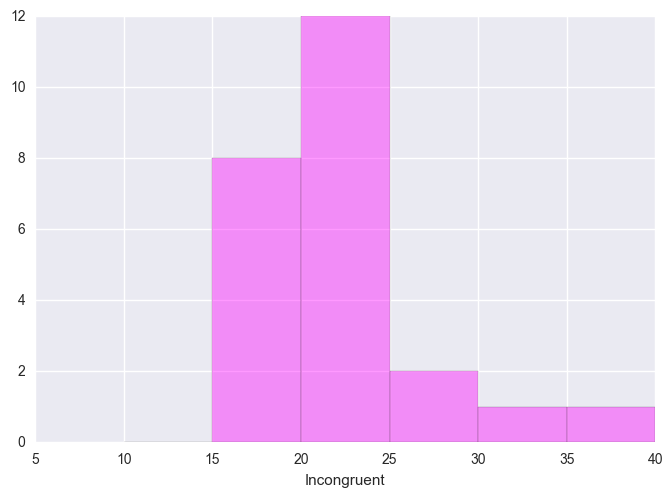

In [51]:
# make two figures and two plots
fig, ax = plt.subplots()
fig, az = plt.subplots()

# two plots, one figure
sns.distplot(cong, bins=range(5,45,5), color='green', ax=ax, kde=False)
sns.distplot(incong, bins=range(5,45,5), color='magenta', ax=az, kde=False)

plt.show()